## Content
This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

ID: The title ID on JustWatch.

title: The name of the title.

show type: TV show or movie.

description: A brief description.

release year: The release year.

age certification: The age certification.

runtime: The length of the episode (SHOW) or movie.

genres: A list of genres.

production countries: A list of countries that produced the title.

seasons: Number of seasons if it's a SHOW.

IMDB ID: The title ID on IMDB.

IMDB Score: Score on IMDB.

IMDB Votes: Votes on IMDB.

TMDB Popularity: Popularity on TMDB.

TMDB Score: Score on TMDB.

### And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

person ID: The person ID on JustWatch.

ID: The title ID on JustWatch.

name: The actor or director's name.

character name: The character name.

role: ACTOR or DIRECTOR.

## Tasks

Developing a content-based recommender system using the genres and/or descriptions.

Identifying the main content available on the streaming.

Network analysis on the cast of the titles.

Exploratory data analysis to find interesting insights.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
titles = pd.read_csv("titles.csv")

In [137]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [138]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [139]:
credits= pd.read_csv("credits.csv")

In [140]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [141]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [142]:
titles[titles.id == "tm84618"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [143]:
credits[credits.person_id == 3748].id.values

array(['tm84618', 'tm180542', 'tm145608', 'tm84906', 'tm59428',
       'tm165995', 'tm181533', 'tm311902', 'tm244149', 'tm844497'],
      dtype=object)

In [144]:
titles[titles.id.isin(credits[credits.person_id == 3748].id.values)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
49,tm180542,Once Upon a Time in America,MOVIE,A former Prohibition-era Jewish gangster retur...,1984,R,229,"['drama', 'crime', 'european']","['US', 'IT']",NaN,tt0087843,8.3,342335.0,21.322,8.4
56,tm145608,Awakenings,MOVIE,"Dr. Malcolm Sayer, a shy research physician, u...",1990,PG-13,120,"['drama', 'european']",['US'],NaN,tt0099077,7.8,137549.0,13.761,7.8
299,tm84906,Stardust,MOVIE,In a countryside town bordering on a magical l...,2007,PG-13,122,"['fantasy', 'romance', 'family']","['US', 'IS', 'GB']",NaN,tt0486655,7.6,269043.0,17.538,7.2
727,tm59428,Silver Linings Playbook,MOVIE,After spending eight months in a mental instit...,2012,R,122,"['drama', 'romance', 'comedy']",['US'],NaN,tt1045658,7.7,697481.0,26.254,7.1
765,tm165995,New Year's Eve,MOVIE,The lives of several couples and singles in Ne...,2011,PG-13,113,"['comedy', 'romance', 'documentation']",['US'],NaN,tt1598822,5.6,85658.0,24.531,5.9
998,tm181533,The Big Wedding,MOVIE,To the amusement of their adult children and f...,2013,R,90,"['comedy', 'drama', 'romance']",['US'],NaN,tt1931435,5.6,49549.0,8.928,5.9
2947,tm311902,Jim Norton: Mouthful of Shame,MOVIE,"Fedoras, mom's underpants, and puppy love all ...",2017,NaN,61,['comedy'],['US'],NaN,tt6664120,7.0,1324.0,4.476,6.9
3216,tm244149,The Irishman,MOVIE,"Pennsylvania, 1956. Frank Sheeran, a war veter...",2019,R,209,"['drama', 'crime', 'history', 'thriller']",['US'],NaN,tt1302006,7.8,371209.0,19.740,7.6
4272,tm844497,The Irishman: In Conversation,MOVIE,"Martin Scorsese, Robert De Niro, Joe Pesci, an...",2019,NaN,23,['documentation'],['US'],NaN,NaN,NaN,NaN,6.995,7.6


titles dosyasında;

null
duplicated
value counts
?, - strange values

data cleaning






In [145]:
titles.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [146]:
titles.duplicated().sum()

0

In [147]:
for col in titles.columns :
    print(col)
    print("--"*20)
    print(titles[col].value_counts(dropna=False))
    print("##"*10)
    

id
----------------------------------------
ts300399    1
ts223238    1
ts237014    1
tm835486    1
tm824559    1
           ..
ts79926     1
tm313683    1
ts78558     1
tm319818    1
ts271048    1
Name: id, Length: 5806, dtype: int64
####################
title
----------------------------------------
The Gift                              3
Connected                             3
The Heirs                             2
Manhunt                               2
The Platform                          2
                                     ..
To All the Boys I've Loved Before     1
Extinction                            1
When We First Met                     1
The Babysitter                        1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 5752, dtype: int64
####################
type
----------------------------------------
MOVIE    3759
SHOW     2047
Name: type, dtype: int64
####################
description
----------------------------------------
NaN                    

In [148]:
(titles.values == "-").sum()

0

In [149]:
(titles.values == "?").sum()

0

In [150]:
titles[titles.description.isnull()]  # Bu veriler drop edilebilir mi? Description analizi çok etkilemeyecek bir kolon ise bu kolon da drop edilebilir.

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1186,tm681614,Grandmother's Farm,MOVIE,NaN,2013,NaN,71,"['comedy', 'horror']",[],NaN,tt10033686,2.9,74.0,NaN,NaN
1196,ts271005,幸福料理,SHOW,NaN,2014,TV-14,44,[],[],1.0,NaN,NaN,NaN,0.600,NaN
1805,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN
2310,ts82770,Camarón Revolution,SHOW,NaN,2018,TV-14,52,['reality'],['ES'],1.0,NaN,NaN,NaN,1.673,7.0
2480,ts82375,Beyblade Burst Turbo,SHOW,NaN,2018,TV-Y7,24,"['action', 'scifi']",['JP'],1.0,NaN,NaN,NaN,0.600,0.5
2727,ts90941,"Heidi, bienvenida a casa",SHOW,NaN,2017,TV-Y,46,"['comedy', 'family']",['AR'],1.0,tt7183310,6.2,20.0,4.135,8.8
2888,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,['documentation'],['BR'],NaN,tt16114198,6.6,5.0,0.738,5.8
3019,ts106612,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018,TV-PG,40,['reality'],[],1.0,tt8908110,NaN,NaN,NaN,NaN
3129,ts268283,RIDE ON TIME,SHOW,NaN,2018,TV-PG,24,[],['JP'],3.0,NaN,NaN,NaN,1.524,NaN
3746,ts312044,Beyblade Burst Surge,SHOW,NaN,2020,TV-Y,23,['animation'],[],1.0,tt18554728,NaN,NaN,10.678,9.5


In [151]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [152]:
# Movie ise season bilgisi 0 girilebilir.

In [153]:
titles.seasons.value_counts()

1.0     1187
2.0      374
3.0      181
4.0      116
5.0       76
6.0       40
7.0       16
8.0       14
9.0        9
11.0       7
10.0       5
15.0       4
12.0       4
24.0       3
13.0       2
14.0       2
19.0       1
18.0       1
29.0       1
21.0       1
42.0       1
39.0       1
37.0       1
Name: seasons, dtype: int64

In [154]:
titles.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0


In [155]:
titles.sample(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
435,tm134235,One Piece: Strong World,MOVIE,"20 years after his escape from Impel Down, the...",2009,PG-13,114,"['fantasy', 'animation', 'action']",['JP'],NaN,tt1485763,7.5,5382.0,25.322,7.5
793,tm72251,What About Dick?,MOVIE,What About Dick? begins with the birth of a se...,2012,G,80,['comedy'],"['US', 'GB']",NaN,NaN,NaN,NaN,5.564,7.4
4741,tm922943,Beyond the Boundary: ICC Women's T20 World Cup...,MOVIE,The ICC Women's T20 World Cup 2020 was a landm...,2020,NaN,59,"['documentation', 'sport']",['AU'],NaN,tt15929232,NaN,NaN,1.168,NaN
2552,tm321627,Ali's Wedding,MOVIE,"After a ""white lie"" which spirals out of contr...",2017,NaN,110,"['comedy', 'drama', 'romance']",['AU'],NaN,tt2782692,6.9,4959.0,5.827,7.2
5284,tm813372,Etharkkum Thunindhavan,MOVIE,A lawyer turns judge jury and executioner and ...,2022,NaN,151,"['action', 'crime', 'drama', 'thriller']",['IN'],NaN,tt10340562,7.2,9968.0,NaN,NaN
1442,ts54110,Puffin Rock,SHOW,"Life is sweet on beautiful Puffin Rock, where ...",2015,TV-Y,11,"['animation', 'family', 'comedy', 'european']",['IE'],2.0,tt3590338,8.7,891.0,5.367,7.6
4636,ts222512,Nailed It! France,SHOW,"On this fun and funny competition show, home b...",2019,TV-14,34,['reality'],[],1.0,tt10990804,6.4,112.0,0.713,8.5
2108,tm352588,Tau,MOVIE,"Held captive in a futuristic smart house, a wo...",2018,R,97,"['thriller', 'scifi']",['US'],NaN,tt4357394,5.8,30611.0,12.489,6.2
4696,tm852207,3 Logical Exits,MOVIE,"A sociological meditation on the different ""ex...",2020,NaN,15,['documentation'],"['LB', 'GB', 'DK']",NaN,NaN,NaN,NaN,0.907,NaN
5262,ts304058,Ganglands,SHOW,"Mehdi, a qualified robber, and Liana, an appre...",2021,TV-MA,46,"['action', 'crime', 'drama', 'thriller']",['FR'],1.0,tt13278100,7.0,2460.0,46.384,7.4


In [156]:
(titles == "[]").sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                   68
production_countries    232
seasons                   0
imdb_id                   0
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
dtype: int64

In [157]:
titles.genres.value_counts().head(20)

['comedy']                        510
['drama']                         350
['documentation']                 320
['comedy', 'drama']               141
['drama', 'comedy']               128
['reality']                       120
['drama', 'romance']              112
['comedy', 'documentation']        93
['animation']                      69
[]                                 68
['comedy', 'romance']              63
['comedy', 'drama', 'romance']     60
['crime', 'documentation']         56
['romance', 'drama']               55
['drama', 'comedy', 'romance']     54
['romance', 'comedy']              47
['drama', 'european']              46
['documentation', 'music']         45
['drama', 'thriller']              43
['drama', 'crime']                 42
Name: genres, dtype: int64

In [158]:
titles.genres.isin(["comedy"]).sum()

0

In [229]:
titles.genres.str.extract(r"(\'.+')")[0].str.replace("\'","")  # köşeli parantez ve tırnaklardan kurtulmak için

0                   documentation
1                    crime, drama
2                 comedy, fantasy
3                          comedy
4                          horror
                  ...            
5801               romance, drama
5802         music, documentation
5803                family, drama
5804             action, thriller
5805    family, comedy, animation
Name: 0, Length: 5806, dtype: object

In [230]:
titles.production_countries.str.extract(r"(\'.+')")[0].str.replace("\'","")  # country sütunundaki köşeli parantez ve tırnak işaretlerinden kurtulmak için

0           US
1           US
2           GB
3           GB
4           US
         ...  
5801        NG
5802       NaN
5803    NG, CA
5804       NaN
5805       NaN
Name: 0, Length: 5806, dtype: object

In [245]:
titles[titles.production_countries.str.extract(r"(\'.+')")[0].str.replace("\'","").isin(["US", "CA"])]

(2053, 15)

In [234]:
titles.production_countries.str.extract(r"(\'.+')")[0].str.replace("\'","").value_counts().head(30)

US        1950
IN         605
JP         266
GB         219
KR         210
ES         159
FR         124
CA         103
MX          95
BR          86
PH          80
TR          79
NG          67
DE          65
AU          62
CN          61
ID          56
TW          56
IT          53
GB, US      45
AR          44
CO          41
EG          40
PL          36
TH          32
US, GB      30
ZA          29
CA, US      28
XX          25
US, CA      23
Name: 0, dtype: int64

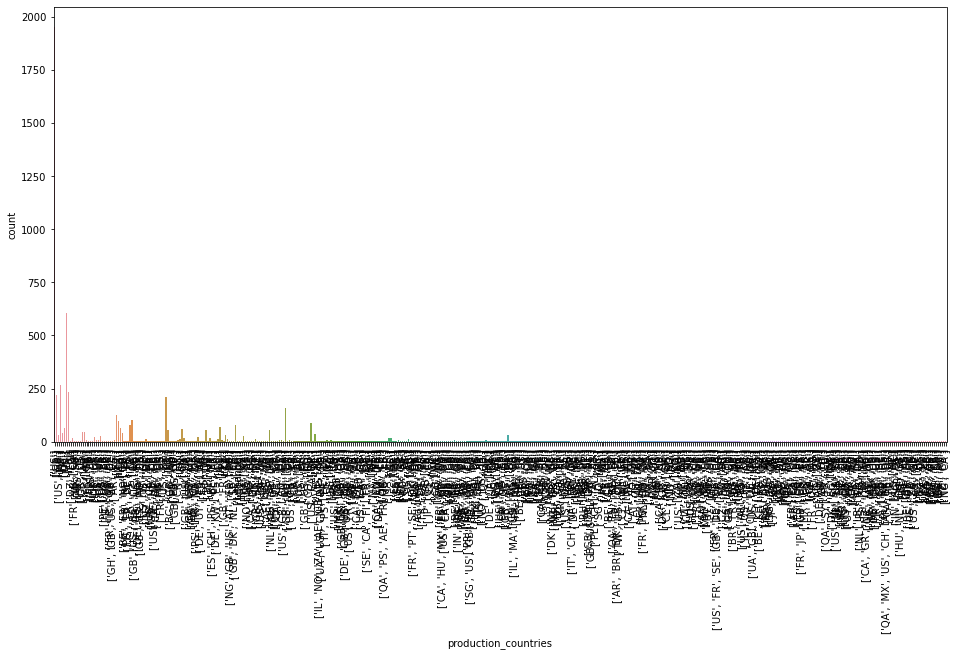

In [235]:
plt.figure(figsize=(16,8))
sns.countplot(data=titles, x="production_countries")
plt.xticks(rotation=90);

In [160]:
pd.Series(titles.genres.value_counts().index).sum().replace("[",",").replace("]",",").replace(",,",",").replace("'","").replace(" ","").split(",")

['',
 'comedy',
 'drama',
 'documentation',
 'comedy',
 'drama',
 'drama',
 'comedy',
 'reality',
 'drama',
 'romance',
 'comedy',
 'documentation',
 'animation',
 '',
 'comedy',
 'romance',
 'comedy',
 'drama',
 'romance',
 'crime',
 'documentation',
 'romance',
 'drama',
 'drama',
 'comedy',
 'romance',
 'romance',
 'comedy',
 'drama',
 'european',
 'documentation',
 'music',
 'drama',
 'thriller',
 'drama',
 'crime',
 'romance',
 'comedy',
 'drama',
 'thriller',
 'comedy',
 'european',
 'documentation',
 'sport',
 'thriller',
 'crime',
 'drama',
 'thriller',
 'drama',
 'comedy',
 'family',
 'animation',
 'family',
 'drama',
 'thriller',
 'crime',
 'drama',
 'romance',
 'comedy',
 'music',
 'documentation',
 'crime',
 'drama',
 'thriller',
 'horror',
 'thriller',
 'documentation',
 'european',
 'drama',
 'sport',
 'documentation',
 'crime',
 'documentation',
 'history',
 'family',
 'horror',
 'drama',
 'history',
 'thriller',
 'horror',
 'crime',
 'drama',
 'romance',
 'action',
 'dr

In [161]:
(titles.genres.str.replace("[", "").str.replace("]", "").isin(["comedy"])).sum()

C:\Users\user\AppData\Local\Temp/ipykernel_2568/115914646.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  (titles.genres.str.replace("[", "").str.replace("]", "").isin(["comedy"])).sum()


0

In [163]:
for i in titles.genres:
    print('comedy' in i)

False
False
True
True
False
True
False
False
False
False
False
False
True
True
False
True
True
False
False
True
False
False
False
False
False
True
False
True
False
True
False
False
True
True
True
True
False
False
False
False
False
False
True
False
False
False
False
True
False
False
True
True
False
False
False
False
False
True
True
False
True
True
True
False
False
True
True
True
False
False
True
True
True
False
False
True
False
False
True
False
False
False
False
False
True
True
False
False
False
False
False
False
True
True
False
False
True
False
True
False
False
False
False
False
False
False
False
True
True
True
True
False
True
False
True
False
True
False
True
False
False
True
False
False
False
True
False
True
False
False
False
False
False
True
True
False
False
False
True
False
True
False
False
True
False
True
False
False
False
True
False
False
True
False
False
False
False
False
True
False
False
False
True
False
False
False
True
False
True
True
True
False
True
True
True
False
False
True

False
False
True
False
False
False
True
False
True
False
False
False
False
True
False
True
False
True
True
False
False
False
True
True
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
True
True
False
True
False
True
False
False
True
True
False
True
True
True
True
True
False
False
False
False
False
True
True
False
True
False
True
False
False
True
False
False
False
False
False
True
False
True
False
False
False
True
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
True
False
True
False
False
False
False
False
False
True
True
True
False
False
False
True
True
False
True
True
True
True
False
True
False
True
True
False
False
True
False
True
True
True
False
False
False
True
False
True
True
False
False
False
False
True
True
False
False
True
True
True
False
True
False
True
True
False
False
False
True
True
True
False
False
False
False
True
False
True
False
False
False
Tru

True
False
False
False
True
True
False
True
False
True
True
False
False
False
True
False
False
False
False
True
True
False
False
False
True
False
False
True
False
False
True
True
True
True
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
True
False
False
False
True
True
True
True
True
False
True
False
False
False
False
False
False
True
False
True
True
False
True
True
False
True
False
True
False
True
False
False
False
False
True
True
False
True
True
False
False
False
False
False
False
False
True
False
False
False
False
True
False
True
True
False
False
False
False
True
True
False
False
True
False
False
True
False
True
True
True
False
True
False
False
False
True
False
True
True
False
False
False
True
False
True
True
False
False
False
False
True
True
False
False
True
False
False
True
False
True
False
False
False
False
False
True
False
Fa

In [164]:
titles.genres.str.extract("(\w+)")

,0
0,documentation
1,crime
2,comedy
3,comedy
4,horror
...,...
5801,romance
5802,music
5803,family
5804,action


In [165]:
titles.genres[titles.genres.transform(lambda x : True if "comedy" in x else False)]

2                                   ['comedy', 'fantasy']
3                                              ['comedy']
5                                  ['comedy', 'european']
12      ['comedy', 'animation', 'action', 'fantasy', '...
13                            ['comedy', 'documentation']
                              ...                        
5795                       ['comedy', 'drama', 'romance']
5797                                ['romance', 'comedy']
5799                                           ['comedy']
5800                                           ['comedy']
5805                    ['family', 'comedy', 'animation']
Name: genres, Length: 2269, dtype: object

In [166]:
titles.production_countries.value_counts().sample(10)

['BE', 'DE']                       1
['GB', 'US', 'EG']                 1
['CZ', 'FR', 'GB']                 1
['DK']                            11
['SE', 'CA', 'FI', 'FR', 'DE']     1
['DK', 'NL', 'NO', 'SE']           1
['UA', 'GB', 'US', 'NL', 'PL']     1
['LU', 'CA', 'FR']                 1
['AT']                             5
['FR', 'IN']                       1
Name: production_countries, dtype: int64

In [ ]:
# genres ve country kolonları düzenlenecek

In [167]:
(titles.genres.str.strip("[]\'").str.replace("'", "") == "").sum()

68

In [168]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [169]:
# numerical features

In [179]:
titles[titles.imdb_score.isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
32,tm97793,Lock Your Girls In,MOVIE,Dr. Raafat faces challenges and difficulties i...,1980,NaN,230,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.313,8.0
33,tm85426,The Witness Who Didn't See Anything,MOVIE,"An Egyptian comedy play about an innocent, clu...",1976,NaN,217,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.612,7.7
34,tm188894,The School of Mischief,MOVIE,This play is about a female teacher and how sh...,1973,NaN,251,['comedy'],['EG'],NaN,NaN,NaN,NaN,3.381,8.5
91,tm126791,The Married Couples,MOVIE,The story revolves around the problems of marr...,1981,NaN,194,['drama'],['EG'],NaN,NaN,NaN,NaN,1.532,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.060,10.0
5793,ts296698,Glimpses of a Future,SHOW,A few weeks into the first COVID-19 lockdown i...,2021,TV-PG,4,[],[],1.0,tt14754320,NaN,NaN,0.600,NaN
5794,ts297061,Masameer County,SHOW,"A humorous view of a changing Saudi Arabia, as...",2021,TV-MA,23,[],['SA'],1.0,NaN,NaN,NaN,0.959,8.0
5799,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,NaN,NaN,NaN,0.600,NaN


In [173]:
titles[titles.imdb_score.isnull()].release_year.value_counts()

2020    148
2019     99
2021     71
2018     41
2022     35
2017     25
2016     20
2015     10
2014      9
2013      8
2011      8
2004      6
2008      6
2012      5
1991      4
2006      4
2007      4
2009      3
2003      2
2010      2
2001      1
1976      1
1973      1
1981      1
1985      1
1989      1
1998      1
1992      1
1999      1
2005      1
2002      1
1980      1
1945      1
Name: release_year, dtype: int64

In [176]:
titles.tmdb_score.value_counts().sort_index()

0.5      1
1.0     10
2.0     15
2.3      1
2.4      1
        ..
9.5      9
9.6      1
9.7      3
9.8      6
10.0    71
Name: tmdb_score, Length: 78, dtype: int64

In [178]:
titles.imdb_score.value_counts().sort_index()

1.5    1
1.6    1
1.7    3
1.8    1
1.9    1
      ..
9.1    2
9.2    3
9.3    3
9.5    1
9.6    2
Name: imdb_score, Length: 81, dtype: int64

In [181]:
((titles.imdb_score.isnull())&(titles.tmdb_score.isnull())).sum()

90

In [182]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [183]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

## Release Year

In [184]:
titles.release_year.value_counts()

2019    848
2020    805
2018    774
2021    758
2017    580
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: release_year, Length: 67, dtype: int64

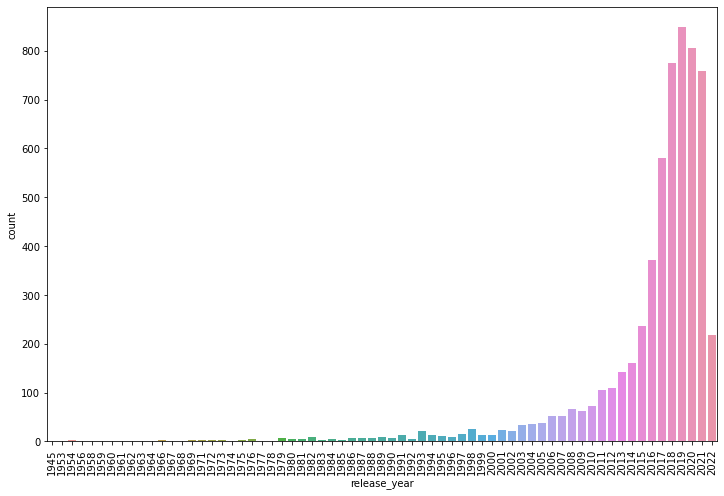

In [188]:
plt.figure(figsize=(12,8))
sns.countplot(data=titles, x="release_year")
plt.xticks(rotation=90);

In [ ]:
# 2000 ve sonrası analize alınabilir.
# 2000 öncesi yeterli veri yok.

<AxesSubplot:xlabel='release_year'>

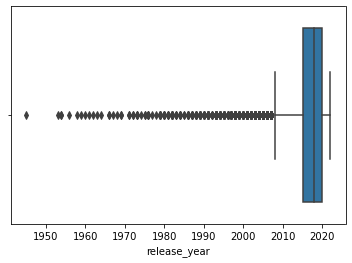

In [189]:
sns.boxplot(data=titles, x="release_year")

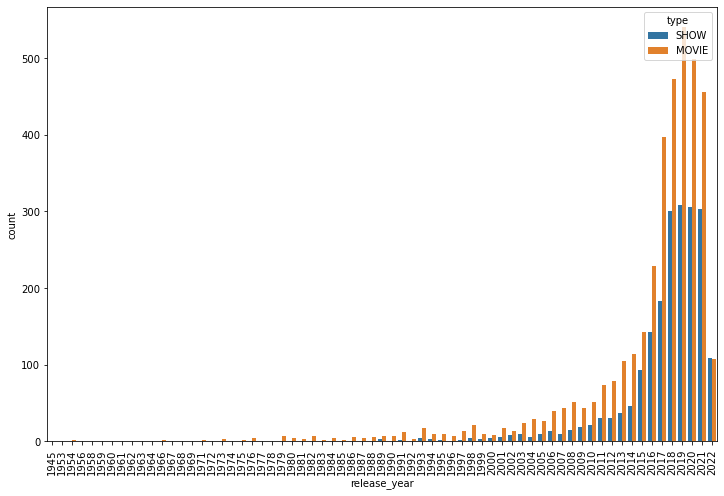

In [190]:
plt.figure(figsize=(12,8))
sns.countplot(data=titles, x="release_year", hue="type")
plt.xticks(rotation=90);

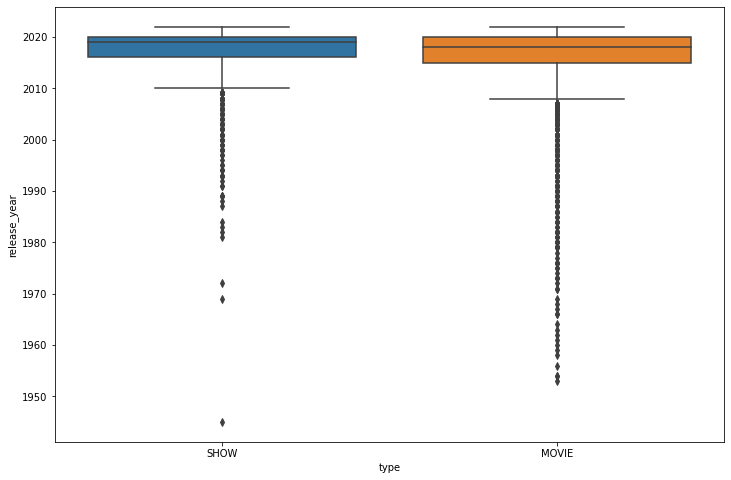

In [193]:
plt.figure(figsize=(12,8))
sns.boxplot(data=titles, y="release_year", x="type");

## runtime

In [194]:
titles.runtime.value_counts()

24     129
90     122
45     108
95     105
100    104
      ... 
192      1
213      1
183      1
173      1
176      1
Name: runtime, Length: 205, dtype: int64

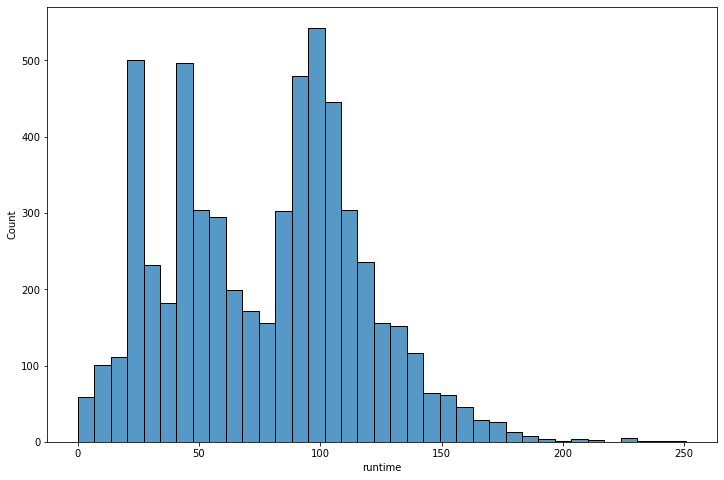

In [196]:
plt.figure(figsize=(12,8))
sns.histplot(data=titles, x="runtime");

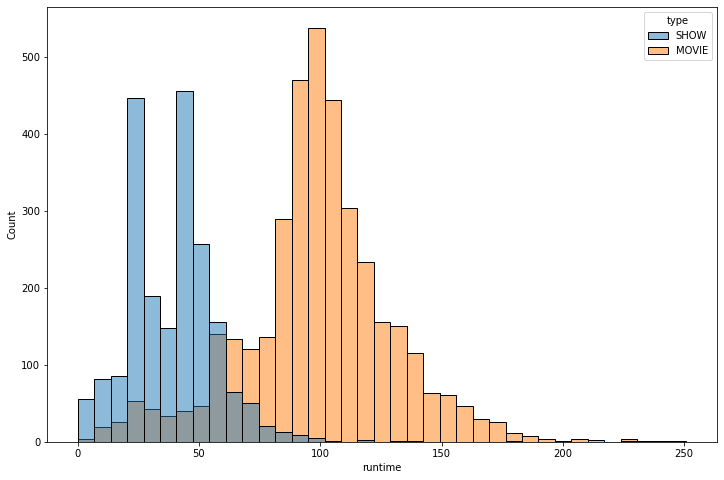

In [197]:
plt.figure(figsize=(12,8))
sns.histplot(data=titles, x="runtime", hue="type");

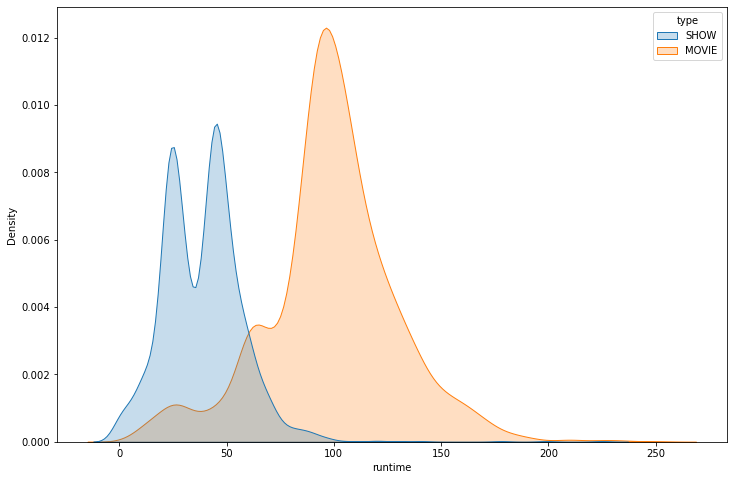

In [199]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=titles, x="runtime", hue="type", shade=True);

In [206]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

## seasons

In [207]:
titles.seasons.value_counts()

1.0     1187
2.0      374
3.0      181
4.0      116
5.0       76
6.0       40
7.0       16
8.0       14
9.0        9
11.0       7
10.0       5
15.0       4
12.0       4
24.0       3
13.0       2
14.0       2
19.0       1
18.0       1
29.0       1
21.0       1
42.0       1
39.0       1
37.0       1
Name: seasons, dtype: int64

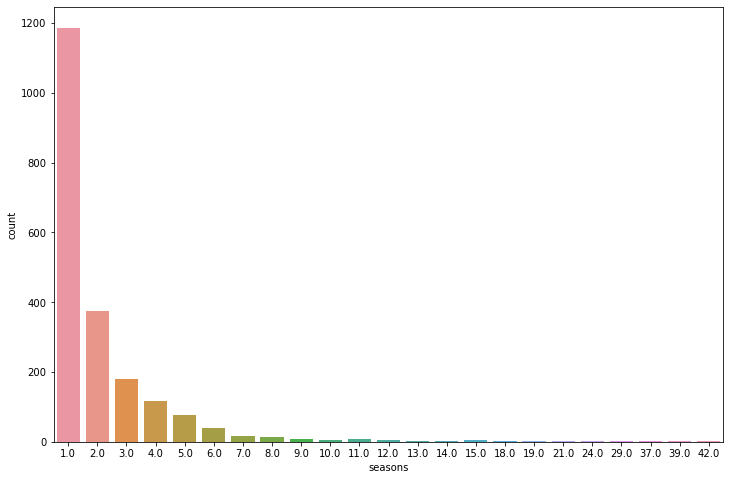

In [208]:
plt.figure(figsize=(12,8))
sns.countplot(data=titles, x="seasons");

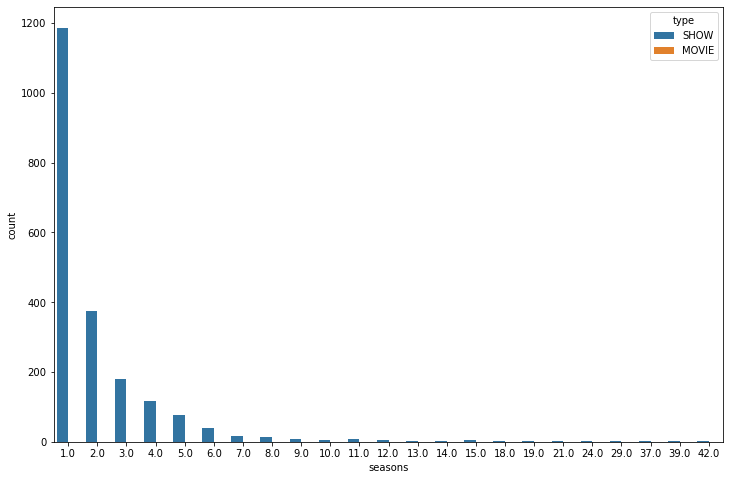

In [209]:
plt.figure(figsize=(12,8))
sns.countplot(data=titles, x="seasons", hue="type");

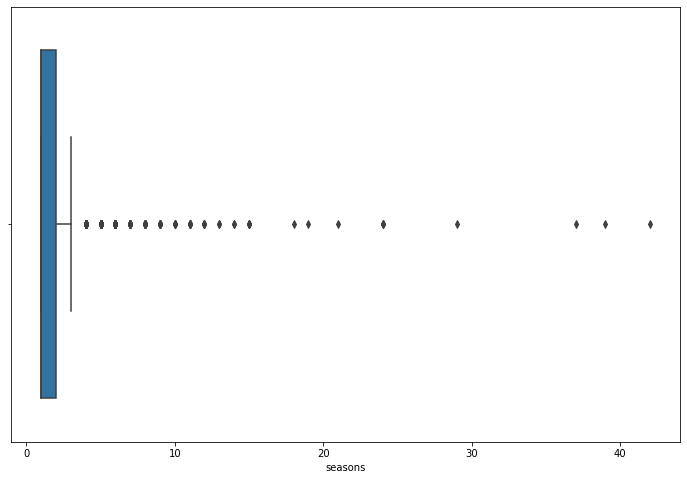

In [210]:
plt.figure(figsize=(12,8))
sns.boxplot(data=titles, x="seasons");

In [212]:
(titles.seasons >= 20).sum()

8

In [211]:
titles[titles.seasons >= 20]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
57,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,tt0086815,6.5,4948.0,49.384,6.6
64,ts25028,Wheel of Fortune,SHOW,This game show sees contestants solve word puz...,1983,TV-G,26,['family'],['US'],39.0,tt0072584,6.7,3126.0,1440.855,6.7
105,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,['reality'],['US'],42.0,tt0239195,7.4,24368.0,73.107,7.3
107,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"['scifi', 'action', 'comedy', 'fantasy', 'anim...",['JP'],24.0,tt0168366,7.6,172.0,138.135,7.6
110,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"['action', 'comedy', 'animation', 'drama', 'fa...",['JP'],21.0,tt0388629,8.8,112586.0,105.955,8.8
114,ts5145,The Challenge,SHOW,Each Challenge pits numerous cast members from...,1998,TV-14,40,"['reality', 'comedy', 'drama', 'scifi']",['US'],37.0,tt0176095,7.8,3274.0,15.699,7.6
123,ts20960,Power Rangers,SHOW,A team of teenagers with attitude are recruite...,1993,TV-Y7,22,"['scifi', 'action', 'fantasy', 'family']",['US'],29.0,tt0106064,6.5,21949.0,21.083,6.7
284,ts2230,America's Next Top Model,SHOW,Aspiring models compete for a chance to break ...,2003,TV-14,44,['reality'],['US'],24.0,tt0391576,5.6,17843.0,12.812,5.3


In [213]:
titles[titles.seasons >= 10]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
57,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,tt0086815,6.5,4948.0,49.384,6.6
64,ts25028,Wheel of Fortune,SHOW,This game show sees contestants solve word puz...,1983,TV-G,26,['family'],['US'],39.0,tt0072584,6.7,3126.0,1440.855,6.7
66,ts2760,Fireman Sam,SHOW,Follow the adventures of fireman Sam and his c...,1987,TV-Y,10,"['comedy', 'animation', 'family', 'crime', 'eu...",['GB'],13.0,tt0329829,6.1,1759.0,25.697,7.3
67,ts987,Danger Mouse,SHOW,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,15,"['comedy', 'family', 'scifi', 'animation', 'eu...",['GB'],10.0,tt0081848,7.4,3514.0,7.748,7.4
105,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,['reality'],['US'],42.0,tt0239195,7.4,24368.0,73.107,7.3
106,ts22176,Stargate SG-1,SHOW,The story of Stargate SG-1 begins about a year...,1997,TV-PG,44,"['scifi', 'drama', 'action']","['US', 'CA']",10.0,tt0118480,8.4,90196.0,167.570,8.2
107,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"['scifi', 'action', 'comedy', 'fantasy', 'anim...",['JP'],24.0,tt0168366,7.6,172.0,138.135,7.6
110,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"['action', 'comedy', 'animation', 'drama', 'fa...",['JP'],21.0,tt0388629,8.8,112586.0,105.955,8.8
114,ts5145,The Challenge,SHOW,Each Challenge pits numerous cast members from...,1998,TV-14,40,"['reality', 'comedy', 'drama', 'scifi']",['US'],37.0,tt0176095,7.8,3274.0,15.699,7.6
123,ts20960,Power Rangers,SHOW,A team of teenagers with attitude are recruite...,1993,TV-Y7,22,"['scifi', 'action', 'fantasy', 'family']",['US'],29.0,tt0106064,6.5,21949.0,21.083,6.7


In [214]:
titles[titles.seasons >= 30]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
64,ts25028,Wheel of Fortune,SHOW,This game show sees contestants solve word puz...,1983,TV-G,26,['family'],['US'],39.0,tt0072584,6.7,3126.0,1440.855,6.7
105,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,['reality'],['US'],42.0,tt0239195,7.4,24368.0,73.107,7.3
114,ts5145,The Challenge,SHOW,Each Challenge pits numerous cast members from...,1998,TV-14,40,"['reality', 'comedy', 'drama', 'scifi']",['US'],37.0,tt0176095,7.8,3274.0,15.699,7.6


In [215]:
titles.release_year.max()

2022

In [ ]:
titles.seasons.value_counts()

In [216]:
titles[titles.seasons >= 10].count()

id                      34
title                   34
type                    34
description             34
release_year            34
age_certification       33
runtime                 34
genres                  34
production_countries    34
seasons                 34
imdb_id                 33
imdb_score              33
imdb_votes              33
tmdb_popularity         33
tmdb_score              33
dtype: int64

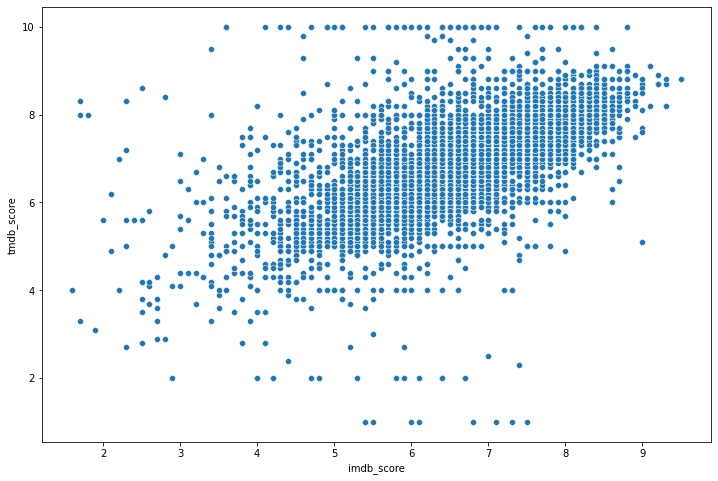

In [204]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=titles, x="imdb_score", y="tmdb_score");

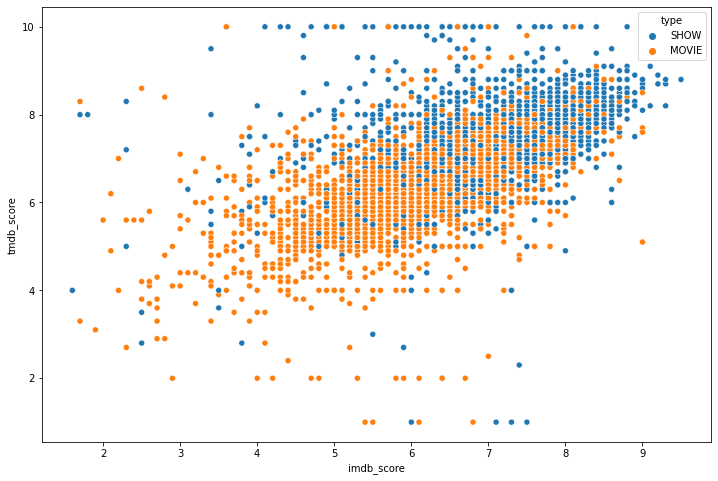

In [205]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=titles, x="imdb_score", y="tmdb_score", hue="type");